<a href="https://colab.research.google.com/github/anshuman-8/Loan-Prediction/blob/main/Health_Insurance_Charge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Health Insurance  Charge Prediction model

- Using Linear Regression

In [1]:
!pip install hvplot holoviews

     |████████████████████████████████| 3.1 MB 28.1 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import hvplot.pandas
# from sklearn.metrics import mean_squared_error

In [3]:
health_data = pd.read_csv("/content/insurance.csv")
# Loan_data=datasets.loan_dataset.csv
health_data.head()
# Loan_data.shape

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
health_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
cols = ['sex',"smoker","region"]
le = LabelEncoder()
for col in cols:
    health_data[col] = le.fit_transform(health_data[col])
health_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


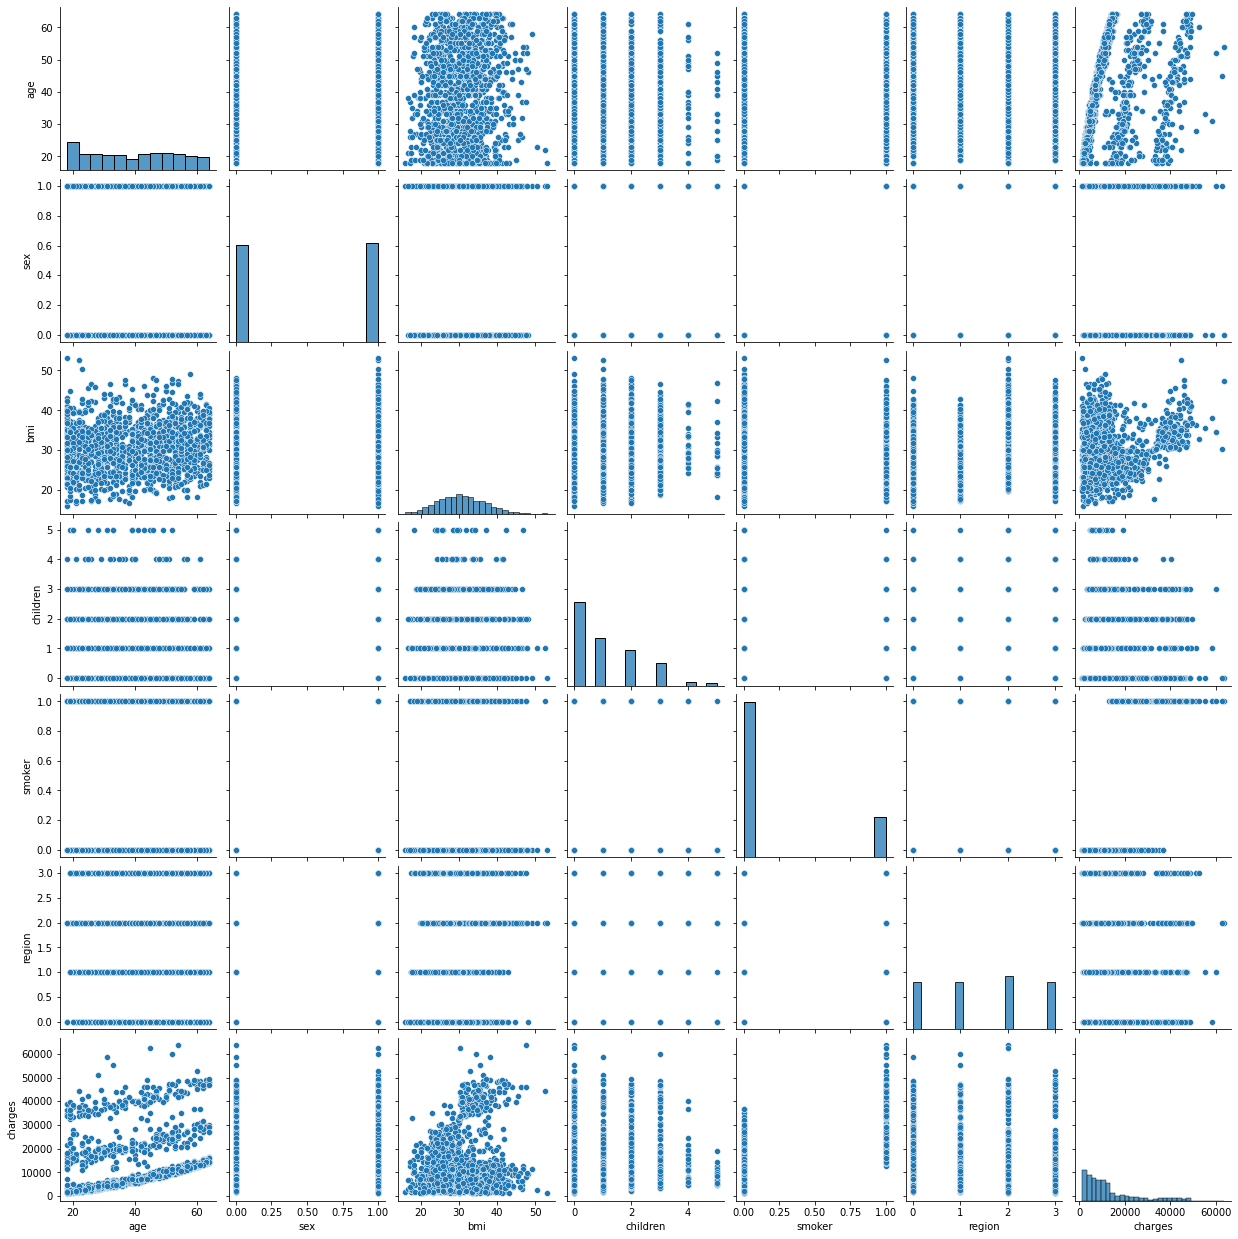

In [6]:
sns.pairplot(health_data)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


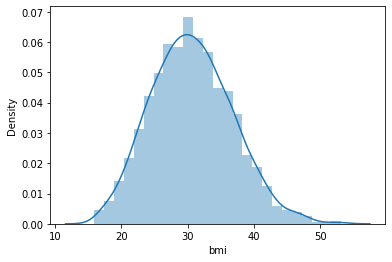

In [7]:
# health_data['bmi_log'] = np.log(health_data['bmi']+1)
sns.distplot(health_data["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


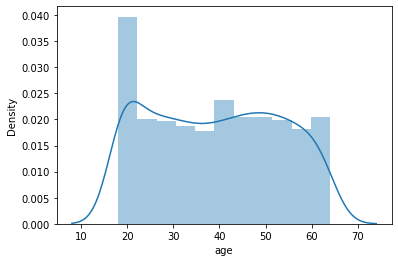

In [8]:
# health_data['age'] = np.log(health_data['age']+1)
sns.distplot(health_data["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


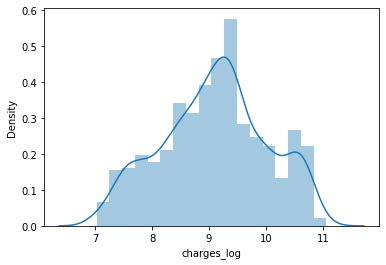

In [9]:
health_data['charges_log'] = np.log(health_data['charges']+1)
sns.distplot(health_data["charges_log"])

In [31]:
correlation=health_data.corr()
print(correlation['charges'].sort_values(ascending=False),'/n')
# printing corelation between charges and other values


charges        1.000000
charges_log    0.892996
smoker         0.787251
age            0.299008
bmi            0.198341
children       0.067998
sex            0.057292
region        -0.006208
Name: charges, dtype: float64 /n


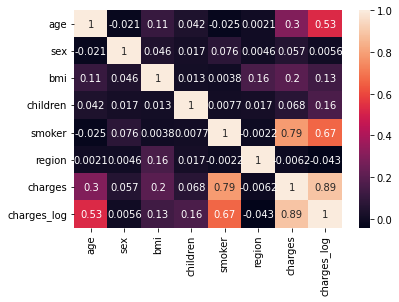

In [34]:
sns.heatmap(health_data.corr(), annot=True)
# lighter the color higher the value and more is the correlation between them

In [35]:
# dataX,dataY=health_data[['age','bmi','sex','region','children','smoker']], health_data['charges_log']
dataX,dataY=health_data[['age','bmi','sex','region','children','smoker']], health_data['charges']


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)

In [39]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, dataX, dataY, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [40]:
lin_reg = linear_model.LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [41]:
print(lin_reg.intercept_)

-12364.391322279229


In [42]:
coeff_df = pd.DataFrame(lin_reg.coef_, dataX.columns, columns=['Coefficient'])
coeff_df


,Coefficient
age,261.625690
bmi,344.544831
sex,109.647196
region,-326.462625
children,424.370166
smoker,23620.802521


In [43]:
pred = lin_reg.predict(X_test)

In [44]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [45]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [46]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4155.239843059381
MSE: 33805466.898688614
RMSE: 5814.246890069995
R2 Square 0.7694415927057693
__________________________________
Train set evaluation:
_____________________________________
MAE: 4251.5347976217045
MSE: 37751183.757691585
RMSE: 6144.199195801808
R2 Square 0.74225713201721
__________________________________


In [47]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(linear_model.LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,4155.239843,3.380547e+07,5814.24689,0.769442,0.744805


In [48]:
acc= lin_reg.score(X_train,y_train)*100
print(acc)

74.22571320172099


In [49]:
# model=linear_model.LinearRegression(normalize=True)
# model.fit(dataX,dataY)

In [50]:
# pridicted_Y=model.predict(dataX)
# # print(pridicted_Y)
# acc= model.score(dataX,dataY)*100
# print(acc)

In [51]:
print("Weights: ",lin_reg.coef_)
print("Intercepts: ",lin_reg.intercept_)
wt=list(lin_reg.coef_)
print(wt)
wt=[lin_reg.intercept_]+wt
print(wt)
wt=np.array([wt])
print(wt)
print(wt.shape)

Weights:  [  261.62568984   344.54483066   109.64719595  -326.46262527
   424.37016596 23620.80252148]
Intercepts:  -12364.391322279229
[261.6256898427474, 344.5448306560345, 109.64719595060312, -326.4626252721889, 424.3701659576326, 23620.802521481743]
[-12364.391322279229, 261.6256898427474, 344.5448306560345, 109.64719595060312, -326.4626252721889, 424.3701659576326, 23620.802521481743]
[[-12364.39132228    261.62568984    344.54483066    109.64719595
    -326.46262527    424.37016596  23620.80252148]]
(1, 7)


In [53]:
age=int(input("Enter age: "))
s=int(input("Enter sex (female -0 ;male -1): "))
bmi=float(input("Enter bmi: "))
# bmi=np.log(bmi+1)
c=int(input("Enter no. of children: "))
s=int(input("are u a smoker(yes-1 ; no-0): "))
re=int(input("Enter region number(northwest-1 ;southeast-2 ;southwest-3 ;northeast-4): "))
var=np.array([1,age,bmi,s,re,c,s])
print(var.shape)
print(var)

Enter age: 60
Enter sex (female -0 ;male -1): 0
Enter bmi: 25.84
Enter no. of children: 0
are u a smoker(yes-1 ; no-0): 0
Enter region number(northwest-1 ;southeast-2 ;southwest-3 ;northeast-4): 1
(7,)
[ 1.   60.   25.84  0.    1.    0.    0.  ]


In [54]:
# print(np.exp(np.matmul(wt,var)))
print(np.matmul(wt,var))

[11909.72586717]


***Reference***: https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

https://www.kaggle.com/faressayah/linear-regression-house-price-prediction/notebook#%E2%9C%94%EF%B8%8F-Artficial-Neural-Network

***Dataset***: https://www.kaggle.com/annetxu/health-insurance-cost-predicition/data